In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import sklearn
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import glob
import pandas as pd

In [3]:
base_path = '/content/drive/MyDrive/Images/'
file_array = []
for i in range(4):
  file_array.append(glob.glob(base_path + str(i) + '/*.jpg'))

print(file_array)

[['/content/drive/MyDrive/Images/0/1.jpg', '/content/drive/MyDrive/Images/0/6.jpg', '/content/drive/MyDrive/Images/0/5.jpg', '/content/drive/MyDrive/Images/0/2.jpg', '/content/drive/MyDrive/Images/0/3.jpg', '/content/drive/MyDrive/Images/0/4.jpg', '/content/drive/MyDrive/Images/0/7.jpg', '/content/drive/MyDrive/Images/0/8.jpg', '/content/drive/MyDrive/Images/0/0.jpg', '/content/drive/MyDrive/Images/0/9.jpg'], ['/content/drive/MyDrive/Images/1/2.jpg', '/content/drive/MyDrive/Images/1/9.jpg', '/content/drive/MyDrive/Images/1/3.jpg', '/content/drive/MyDrive/Images/1/0.jpg', '/content/drive/MyDrive/Images/1/8.jpg', '/content/drive/MyDrive/Images/1/6.jpg', '/content/drive/MyDrive/Images/1/4.jpg', '/content/drive/MyDrive/Images/1/5.jpg', '/content/drive/MyDrive/Images/1/1.jpg', '/content/drive/MyDrive/Images/1/7.jpg'], ['/content/drive/MyDrive/Images/2/0.jpg', '/content/drive/MyDrive/Images/2/9.jpg', '/content/drive/MyDrive/Images/2/8.jpg', '/content/drive/MyDrive/Images/2/7.jpg', '/content/

In [4]:
# alegem un sample aleator pentru reproductibilitate
random.seed(42)
# facem train test split - 7 img din fiecare folder pentru train si 3 pt test
image_index_array = random.sample(range(0,10), 7)
# alegem 7 indecsi aleator
print(image_index_array)

[1, 0, 4, 9, 6, 5, 8]


In [5]:
# trecem denumirile pozelor destinate pentru train si test in 2 liste separate
tr_images = []
test_images = []

for folder in file_array:
  t_train = []
  t_test = []
  for files in range(10):
    if files in image_index_array:
      t_train.append(folder[files])
    else:
      t_test.append(folder[files])
  tr_images.append(t_train)
  test_images.append(t_test)

# gruparea este: 4 linii - folders, 7 coloane - images
print(np.shape(tr_images))

(4, 7)


In [6]:
# separam in train si test imaginile propriu-zise incarcate cu cv2
train = []
test = []

for index_image in range(7):
  t = []
  for path in tr_images:
    t.append(cv2.imread(path[index_image]))
  train.append(t)

for index_image in range(3):
  t = []
  for path in test_images:
    t.append(cv2.imread(path[index_image]))
  test.append(t)

# plt.figure(), plt.imshow(train[0])

(7, 4, 4032, 1908, 3)


(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x792a67ca42b0>)

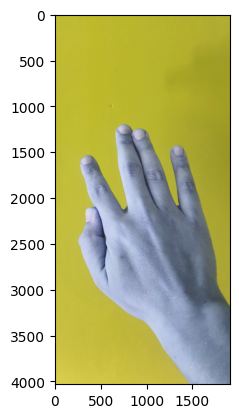

In [7]:
print(np.shape(train))
plt.figure(), plt.imshow(train[0][0]) # imagine in BGR, nu RGB

In [8]:
print(np.shape(train[0][0])) # imaginea 0 din folderul 0

(4032, 1908, 3)


In [9]:
# transformare din brg in rgb
for index, classes in enumerate(train): # (index, [4,w,h,c])
  for index2, image in enumerate(classes): #(index2, [w,h,c])
    im_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    train[index][index2] = cv2.resize(im_rgb,(480,640))

for index, classes in enumerate(test):
  for index2, image in enumerate(classes):
    im_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    test[index][index2] = cv2.resize(im_rgb,(480,640))

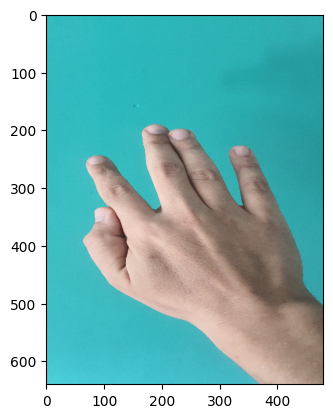

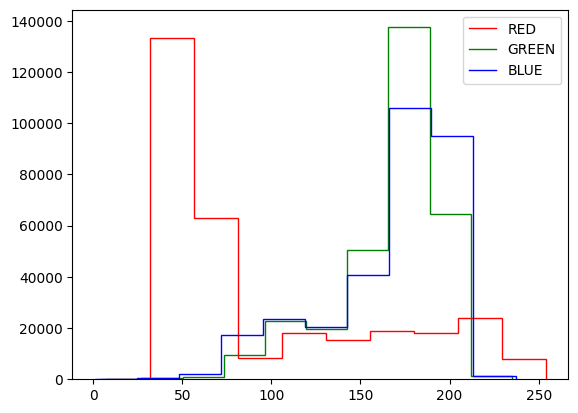

In [10]:
# plotare histograma
# plt.figure(), plt.imshow(train[0][0])
colours = ('r', 'g', 'b')
plt.imshow(train[0][0])
plt.figure()
for color in range(3): #0, 1, 2 - RED, GREEN, BLUE
  counts, bins = np.histogram(train[0][0][:,:,color])
  plt.stairs(counts, bins, color = colours[color])
plt.legend(['RED', 'GREEN', 'BLUE'])

In [11]:
hist_train = []
hist_test = []
for index, classes in enumerate(train): # (index, [4,w,h,c])
  hist_class = []
  for index2, image in enumerate(classes): #(index2, [w,h,c])
    hist_img = []
    for channel in range(3):
      hist_img.append(np.histogram(train[index][index2][:,:,color]))
    hist_class.append(hist_img)
  hist_train.append(hist_class)

for index, classes in enumerate(test): # (index, [4,w,h,c])
  hist_class = []
  for index2, image in enumerate(classes): #(index2, [w,h,c])
    hist_img = []
    for channel in range(3):
      hist_img.append(np.histogram(test[index][index2][:,:,color]))
    hist_class.append(hist_img)
  hist_test.append(hist_class)

print(np.shape(hist_train))

(7, 4, 3, 2)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [12]:
# selectam doar mana din imagine folosindu-ne de valoarea de gri pe canalul de
# verde in care se regaseste mana pentru peilea caucaziana
def get_hand_from_img(image):
  green_pixels = np.array(image[:,:,0])
  green_pixels[green_pixels < 75] = 0
  # plt.imshow(green_pixels, cmap='gray')
  return green_pixels

(7, 4, 640, 480)


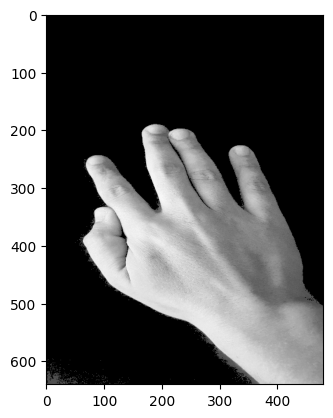

In [13]:
hands_train = []
hands_test = []

for index, classes in enumerate(train): # (index, [4,w,h,c])
  t = []
  for index2, image in enumerate(classes): #(index2, [w,h,c])
    t.append(get_hand_from_img(train[index][index2]))
  hands_train.append(t)

for index, classes in enumerate(test): # (index, [4,w,h,c])
  t = []
  for index2, image in enumerate(classes): #(index2, [w,h,c])
    t.append(get_hand_from_img(test[index][index2]))
  hands_test.append(t)

print(np.shape(hands_train))
plt.imshow(hands_train[0][0], cmap='gray')

Text(0.5, 1.0, 'Binary mask')

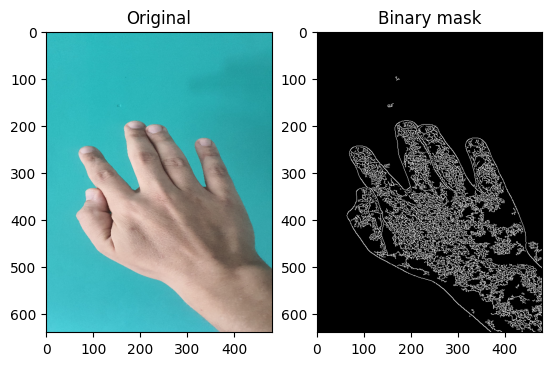

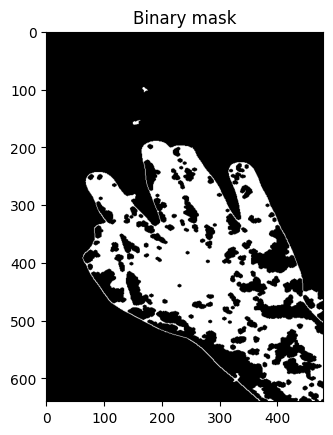

In [14]:
# preluam imaginea cu filtru canny si "umplem golurile" cu filtrare morfologica
# nu se mai trateaza pentru intregul set de date deoarece s-a ales deja
# metoda cu prag fix pus pe histograma (cea de mai sus)
img = train[0][0]
edges = cv2.Canny(img, 10, 80)
plt.figure(1)
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.subplot(122)
plt.imshow(edges, cmap="gray")
plt.title("Binary mask")
nucleu = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, nucleu)
plt.figure()
plt.imshow(edges, cmap="gray")
plt.title("Binary mask")

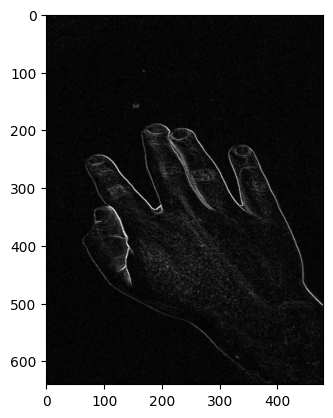

In [15]:
# extragerea mainii cu filtru Sobel - pe x si y
gray = train[0][0][:,:,1]
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    # Gradient-Y
    # grad_y = cv.Scharr(gray,ddepth,0,1)
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

# convertirea in valori strict pozitive
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)


grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
# se compun cele doua filtrari in proportii egale

plt.imshow(grad, cmap='gray')

C1 = (R > 95) & (G > 40) & (B > 20) - valori pentru piele caucaziana

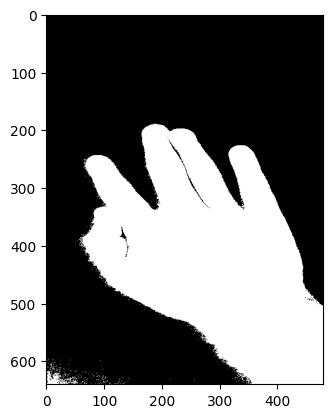

In [16]:
# binarizarea imaginilor
for index, classes in enumerate(train): # (index, [4,w,h,c])
  for index2, image in enumerate(classes): #(index2, [w,h,c])
    hands_train[index][index2][(hands_train[index][index2])>0] = 255


for index, classes in enumerate(test): # (index, [4,w,h,c])
  for index2, image in enumerate(classes): #(index2, [w,h,c])
    hands_test[index][index2][(hands_test[index][index2])>0] = 255

plt.imshow(hands_train[0][0], cmap='gray')

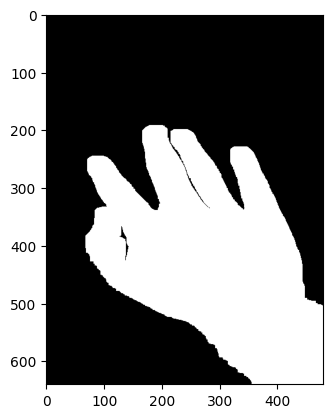

In [17]:
# filtrarea morfologica a imaginii - filtru de deschidere = eroziune + dilatare
# pentru stergerea zgomotului din imagine "considerat" a fi mana (ob de interes)
kernel = np.ones((11,11),np.uint8)

for index, classes in enumerate(train): # (index, [4,w,h,c])
  for index2, image in enumerate(classes): #(index2, [w,h,c])
    hands_train[index][index2] = cv2.morphologyEx(hands_train[index][index2],
                                        cv2.MORPH_OPEN, kernel, iterations = 2)


for index, classes in enumerate(test): # (index, [4,w,h,c])
  for index2, image in enumerate(classes): #(index2, [w,h,c])
    hands_test[index][index2] = cv2.morphologyEx(hands_train[index][index2],
                                        cv2.MORPH_OPEN, kernel, iterations = 2)


plt.imshow(hands_train[0][0], cmap='gray')

In [18]:
# decuparea mainii din imagine
def hand_contour(img, img_orig):
  contour,_ = cv2.findContours(img.astype(np.uint8),
  cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
  arie_max=0
  rect_max = np.array([0,0,0,0])
  for i in contour:
    temp = cv2.boundingRect(i)
    if temp[2]*temp[3] > arie_max:
      arie_max = temp[2]*temp[3]
      rect_max = temp
  return crop_img(img,rect_max), crop_img(img_orig,rect_max)

def crop_img(img, rect):
  return img[rect[1]:(rect[1]+rect[3]),rect[0]:(rect[0]+rect[2])]

In [19]:
for index, classes in enumerate(train): # (index, [4,w,h,c])
  for index2, image in enumerate(classes): #(index2, [w,h,c])
    hands_train[index][index2],train[index][index2] = hand_contour(hands_train[index][index2],
                                                                   train[index][index2])

for index, classes in enumerate(test): # (index, [4,w,h,c])
  for index2, image in enumerate(classes): #(index2, [w,h,c])
    hands_test[index][index2],test[index][index2] = hand_contour(hands_test[index][index2],
                                                                   test[index][index2])

# img_bin, img_orig = hand_contour(img_morph, train[0][0])

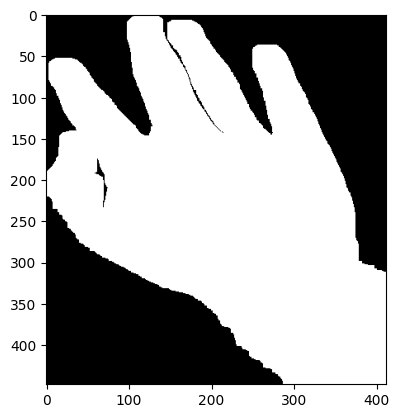

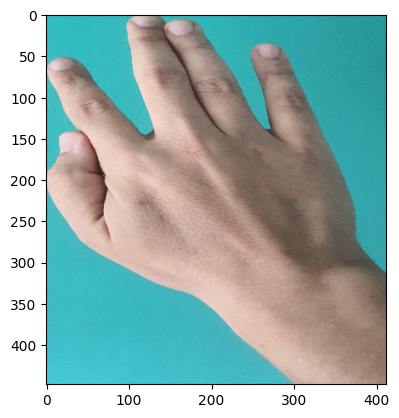

(<Figure size 640x480 with 1 Axes>,
 None)

In [20]:
plt.figure(0), plt.imshow(hands_train[0][0], cmap="gray"), plt.show()
plt.figure(1), plt.imshow(train[0][0]), plt.show()

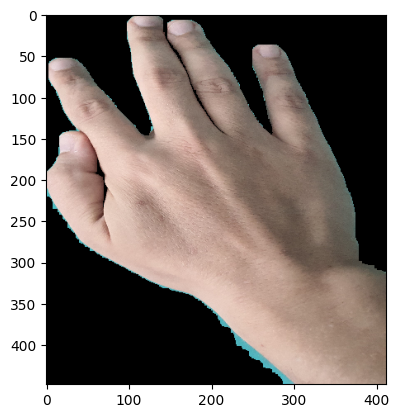

In [21]:
# se elimina fundalul
for index, classes in enumerate(train): # (index, [4,w,h,c])
  for index2, image in enumerate(classes): #(index2, [w,h,c])
   train[index][index2][hands_train[index][index2] == 0] = 0

for index, classes in enumerate(test): # (index, [4,w,h,c])
  for index2, image in enumerate(classes): #(index2, [w,h,c])
    test[index][index2][hands_test[index][index2] == 0] = 0

#img_orig[img_bin == 0] = 0
#plt.imshow(img_orig)

plt.imshow(train[0][0])

# TODO: Iterarea prin intregul set de date si aplicarea functiilor implementate

In [22]:
# HoG OpenCV
# imaginile trebuie redimensionate sa fie de acelasi width si height
height = 128
width = 64

winSize = (32,32)
blockSize = (32,32)
blockStride = (16,16)
cellSize = (16,16)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
rndp = 32
nlevels = 64
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)

In [23]:
descriptors_train = []
labels_train = []

for index, classes in enumerate(train): # (index, [4,w,h,c])
  for index2, image in enumerate(classes): #(index2, [w,h,c])
    train[index][index2] = cv2.resize(train[index][index2], (width, height))
    descriptor = hog.compute(train[index][index2])
    descriptors_train.append(descriptor)
    labels_train.append(index)


print(np.shape(descriptors_train[0]))

(756,)


In [24]:
descriptors_test = []
labels_test = []

for index, classes in enumerate(test): # (index, [4,w,h,c])
  for index2, image in enumerate(classes): #(index2, [w,h,c])
    test[index][index2] = cv2.resize(test[index][index2], (width, height))
    descriptor = hog.compute(test[index][index2])
    descriptors_test.append(descriptor)
    labels_test.append(index)

print(np.shape(descriptors_test[0]))

(756,)


In [31]:
descriptors_train = np.float32(descriptors_train)
labels_train = np.float32(labels_train)
descriptors_test = np.float32(descriptors_test)
labels_test = np.float32(labels_test)

temp = descriptors_test[0]
temp = np.reshape(temp,(1,756))

print(np.shape(descriptors_test))
print(np.shape(temp))

(12, 756)
(1, 756)


In [33]:
knn = cv2.ml.KNearest.create()
knn.train(descriptors_train, cv2.ml.ROW_SAMPLE, labels_train)
results,_,_,_ = knn.findNearest(temp, 3)
print(results)

0.0


In [34]:
labels_train = np.int32(labels_train)
labels_test = np.int32(labels_test)

In [35]:
svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, 100, 1e-6))
svm.train(descriptors_train, cv2.ml.ROW_SAMPLE, labels_train)

True

In [36]:
ret = svm.predict(temp)[1]
print(ret)

[[0.]]


In [ ]:
# de pus intr-o bulca, de testat si gasit o acuratete pentru SVM si NN